# **xSoc Python Course** - Week 5

### *Exceptions, Readability and Libraries*

---

## Programming Practices

*"Everyone can code!"* is a common phrase used by motivational speakers, to attract people into trying it out. Now, think back to Week 1. How many people were in the room compared to now? A more accurate phrase is probably something like *"Everyone can code, but not everyone has the time to do it properly."*

One of the awkward realities that you're going to face is that at some point, another person might have to end up reading it. Putting in effort to make sure your script is easy for others to understand goes a long way, especially when that someone might be you, coming back to something you wrote 3 months ago. The general term for confusing, unclear, or badly written code is ***spaghetti code*** - no prizes for guessing why.

Here's an example:

In [ ]:
def x(a, b , c):
    ac = 0
    bc = 0
    cc  = 0
    i = 0
    for d in a:
        j = 0
        for e in b:
            if j != i:
                j = j + 1
                continue
            k =  0
            for f in c:
                if k != j:
                    k = k + 1
                    continue
                if k == i:
                    match y(d, e, f):
                        case 0:
                            ac  = ac + 1
                        case 2:
                            cc = cc + 1  # add one to cc
                        case _:
                            bc += 1
                else:
                    k = k + 2
                    continue
                k = k + 1
            j = j + 1
        i = i + 1
    return y(ac, bc, cc)

def y(nOne, nTwo, nThree):
    ans = 0
    if ((nOne != nTwo) == True):
        match (not (nOne < nTwo)):
            case True:
                if nThree > nOne:
                    ans = ans + 1
                    ans += 1
            case _:
                ans += 1
                if nTwo > nThree != False:
                    return 1
                else:
                    ans += 1 
    elif True:
        return 1 if nOne > nThree else 2
    return ans
    
print(x([5, 8, 0, 3], [4, 7, 2, 4], [9, 4, 6, 1]))

# what did I just read

Can you figure out what that function does? Unless you spend an extremely long time studying it, then no, probably not. Here's a re-written version, that also works on a wider range of input parameters.

In [ ]:
# Accepts a list containing the round scores of all pub quiz players (no dupes)
# Determines the index of the player who won the most rounds (no dupes)
def most_rounds_won(player_breakdown) -> int:

    players_in_quiz = len(player_breakdown)
    rounds_in_quiz = len(player_breakdown[0])
    
    # Regroup (transpose/zip) the 2D list to compare more easily
    # Example: [[1, 2, 3], [4, 5, 6]] into [[1, 4], [2, 5], [3, 6]]
    round_breakdown = [
        [scores[round_num] for scores in player_breakdown] for round_num in range(rounds_in_quiz)
    ]

    counts = [0 for _ in range(players_in_quiz)]  # Used to store the rounds won per player index

    for round_scores in round_breakdown:
        # Find player index of max value for this round, and count it
        max_idx = round_scores.index(max(round_scores))
        counts[max_idx] += 1

    # Return the index with the most rounds won
    return counts.index(max(counts))


print(most_rounds_won([[5, 8, 0, 3], [4, 7, 2, 4], [9, 4, 6, 1]]))


To make your code more readable, there's a few things you can do:
- Use meaningful variable names, and be consistent with how you name variables (such as snake_case)
- Have whitespace (empty lines) in your code to split it up
- Use comments to explain what your code is doing; you don't have to comment every line - just ones where its not obvious or you think the line is important. In fact, over-commenting is just as bad as not commenting at all
- Be consistent with your indentation
- Avoid hard-coding values in your code (e.g. if you had an array length 5, using the number 5 instead of `len(array)`) - it makes it harder to change your code if your values need to change

Often, there are lots of different implementations that solve the same problem. Many of the constructs you've learned over the past weeks will also help with writing readable code, such as:
- Using loops for repeated actions
- Using grouped data structures instead of separate variables
- Using functions if you're going to be repeatedly using the same snippets of code
- Using classes to group common functionality that applies to the same groups of data.
- Use of built-in functions and syntax, or external code libraries
- Use of recursion (but be careful!)

---

## Expect Everything
Throughout the course, you may have run into an error message or two (or three or...). In Python, we typically refer to these as **Exceptions**.

It would be really inconvenient if all programs, ever, crashed the first time they ran into a problem. Luckily, we can write code to deal with these exceptions, should they arise - this is **Exception Handling**. For example, look at this short script that takes an input, converts it to an `int` and doubles it:

In [ ]:
num = int(input("Enter a number: "))
num *= 2
print(num)

Seems fine? But what if the user decides they *don't* want to enter a number, what if, e.g., they enter "Hello"? Python doesn't know how to convert a string to an integer, so it will throw a `ValueError` and exit the program.

In reality, entering the wrong type of data isn't the end of the world. To stop Python from exiting immediately, we can surround any potentially problem-causing code in a `try-except` block like this:

In [ ]:
try:
    num = int(input("Enter a number"))
    num *= 2
    print(num)
except ValueError:
    print("uh oh - that wasn't a number")

The `try` statement tells the Python interpreter that something could go wrong in the following statements, but we know and have ways to deal with it. Any statements after the `try-except` block will execute normally, even if a `ValueError` is raised.

Note: we need `num *= 2` and `print(num)` in the `try` block because if the user inputs something wrong, `num` won't be defined. If the statements were *after* the try statement, this could cause an error as `num` wouldn't be defined.

We can also catch multiple types of exceptions!

In [ ]:
try:
    num = int(input("Enter a number"))
    result = 2 / num
    print(result)
except ValueError:
    print("uh oh - that wasn't a number")
except ZeroDivisionError:
    print("Friends don't let friends divide by zero")

All exceptions are a type of class, all inheriting from the **Exception** class. Also, certain exceptions are also subclasses of other exceptions, e.g. `ZeroDivisionError` is a subclass of `ArithmeticError`, here's a full hierarchy: 

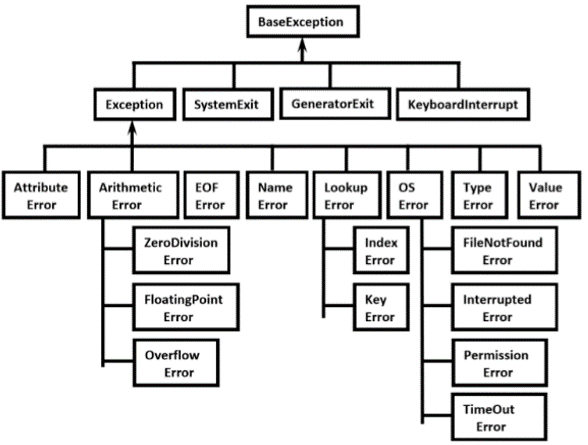

So what if we were to do this:

In [ ]:
try:
    num = int(input("Enter a number"))
    result = 2 / num
    print(result)
except Exception:
    print("Something went wrong :(")
except ValueError:
    print("uh oh - that wasn't a number")
except ZeroDivisionError:
    print("Friends don't let friends divide by zero")

Try running the above block and input a string. Now input 0. We've caused two different errors, but the same statement is being executed. Why?

Since all exceptions are a subclass of **Exception**, Python considers them to be of type **Exception**. Why does this matter? Python executes the *first relevant* except statement - in this case it will *always* be an Exception, so the first statement will execute *regardless* of what type of exception we're throwing. You need to make sure that you put any except statements for subclasses *above* those of their parent classes, otherwise the subclasses will never execute:

In [ ]:
try:
    num = int(input("Enter a number"))
    result = 2 / num
    print(result)
except ValueError:
    print("uh oh - that wasn't a number")
except ZeroDivisionError:
    print("Friends don't let friends divide by zero")
except Exception:
    print("Something went wrong :(")

Sometimes we may not want to continue the program if we encounter an error, if we want to throw an exception, we use the `raise` keyword. For example:

In [ ]:
def division(num1: int, num2: int) -> float:
    if (num2 == 0):
        raise ZeroDivisionError("We've been through this - you can't divide by zero")
    else:
        return num1 / num2

inp_1 = input("Enter first number: ")
inp_2 = input("Enter second number: ")
try:
    inp_1 = int(inp_1)
    inp_2 = int(inp_2)
except ValueError:
    print("uh oh - one of those numbers wasn't a number")

print(division(inp_1, inp_2))

We can also write our own custom exceptions. We define them the same way we define a class, making sure it inherits from **Exception**. Then, we can call it anywhere in our code by using `raise`:

In [ ]:
class MyException(Exception):
    def __init__(self, msg):
        super().__init__(msg)

thing = input("Enter your favourite society: ")
if thing != "UWCS":
    raise MyException("Ding dong, your opinion is wrong")

---

## A Comprehensive Description

You may have gathered by now that Python is a big fan of shorthand notations. We're going to introduce another: List Comprehensions. They let you cut down on the amount of lines and boilerplate code whenever you're creating a list from existing data.

For example, let's say you're trying to create a copy of a list where 100 has been added to every element. One way is like this:

In [ ]:
my_list = [3, 15, 13, 16, 21, 20, 9, 14, 7]

new_list = []
for num in my_list:
    new_list.append(num + 100)

print(new_list)

But another, more condensed version using a list comprehension would be like this:

In [ ]:
my_list = [3, 15, 13, 16, 21, 20, 9, 14, 7]

new_list = [num + 100 for num in my_list]

print(new_list)

In this case, it's much more compact and readable! The general syntax is `comprehension = [expression for elem in iterable]`, where the `expression` can use the `elem` variable. As you might expect, `elem` is set to each element in the `iterable`. Here's a few more examples:

In [ ]:
# Even numbers from 1 to 50
even_50 = [num for num in range(1, 51, 2)]
print(even_50)

# Combining the first character of each word into a string
compliments = ["Crazy", "Ostentacious", "Marvelous", "Perfect", "Unbelievable", "Treasured", "Incredible", "Noble", "Grand"]
secret_word = "".join([word[0] for word in compliments])
print(secret_word)

# Nested list comprehensions to form times tables
times_tables = [[i * j for j in range(1, 11)] for i in range(1, 11)]
print(times_tables)

You can also have an *if* condition after the `iterable` in the comprehension, which acts as a filter. You can use the `elem` varaible here too.

In [ ]:
cvs = [
    "I consider myself to be an epic gamer with only the finest fortnite skills",
    "I'm a highly motivated individual with at least two seconds of experience",
    "After touching my very first controller, I knew it was in my destiny to play games.",
    "I'm literally the daughter of your CEO, you're going to hire me anyways.",
    "Life isn't a game. I'm at the peak of my skills, with years of experience in the industry."
]

no_gamer_cvs = [cv for cv in cvs if "game" not in cv]
print(no_gamer_cvs)

> Task 6: You've been given a list of currently enrolled students at the University in the form of the tuples `(name, year_of_study)`, and want to output a list of names: all the students that will *definitely* be studying next year. Use a single list comprehension to do this.

In [ ]:
enrolled = [("Keegan", 4), ("Alia", 2), ("Tomas", 3), ("Alistair", 2), ("Adriano", 4), ("Piotr", 2)]

# Output the names of who will *definitely* be enrolled next year (assuming they don't fail their exams!)


A word of warning: one of the issues with using list comprehensions is that your 'simplification' has the potential to become unreadable. This is especially true when using nested list comprehensions, or needing overly long conditions with many conditions. If things do start to get tricky to write or awkward to read, it might be best to stick with the long way.

---

# Bonus Tasks

Finished everything else? These tasks are more challenging, and should test your knowledge of our final week of content. Don't be discouraged if you can't do them all, especially as it's our most difficult set!

*You're a pirate, sailing the seven seas and looking for treasure. You've got a treasure map, consisting of a grid split into many different squares. Not only that, but it's marked with the number of buried treasures in each square's region! But alas, the strong tailwinds mean you can only sail to squares south or east of your current location, starting at the most north-west square. Can you find the most bountiful route through these waters, ending at your home port in the very south-east?*

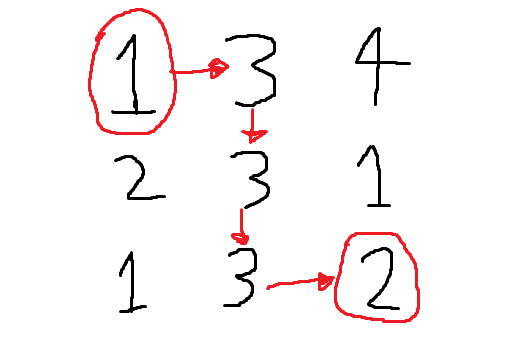

> Bonus 2: Write a function that takes in a 2D list representing the treasure values on each map grid square, and returns the maximum number of treasures that could be claimed in a single trip across these windy waters...

In [ ]:
def maximum_treasure(grid) -> int:
    # This is just the maximum treasure count at the bottom-right grid square. Return it!
    return 0

def max_at_square(grid, x: int, y: int) -> int:
    # What makes a coordinate invalid?
    # What should we return in this case?
    
    # The maximum number of treasures up to and including this square.
    # ...the best of two other best routes, plus itself?
    return 0

print(
    maximum_treasure(
        [
            [1, 3, 4], 
            [2, 3, 1], 
            [1, 3, 2]
        ]
    )  # Should return 12 (1 -> 3 -> 3 -> 3 -> 2)
)
# What will happen on much larger lists?
print(maximum_treasure([[1] * 50] * 50))
# :)

🖋️ ***This week was written by [Computing Society](https://go.uwcs.uk/links)***